#Base Model that Prints Output


In [ ]:
#inputs
total_sqft = 180000

m = -0.05
b = 1.5

op_expense_per_sqft = 1.20
heating_surcharge_per_sqft = .2
op_exp_annual_growth = .12
annual_mortgage = 1500000
tax_rate = .34

price_per_sqft = [15, 15, 15, 15, 15]

num_years = 5


In [ ]:
#rev calc
perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
print("revenue: ", revenue)

revenue:  [2025000.0, 2025000.0, 2025000.0, 2025000.0, 2025000.0]


In [ ]:
#operating expense calculations
base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
mortgage = [annual_mortgage for i in range(num_years)]
operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
print("operating costs:", operating_costs)

operating costs: [1748400.0, 1778208.0, 1811592.96, 1848984.1152000001, 1890862.2090240002]


In [ ]:
#before and after-tax earnings
ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
taxes = [ebt[i]*tax_rate for i in range(num_years)]
earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
print("earnings after tax: ", earnings_after_tax)

total_earnings_after_tax = sum(earnings_after_tax)
print("total earnings after tax: ", total_earnings_after_tax)

earnings after tax:  [182556.0, 162882.72, 140848.64640000003, 116170.48396799993, 88530.94204415986]
total earnings after tax:  690988.7924121597


#Model as Function



In [ ]:
def office_earnings(total_sqft = 180000,
           m = -0.05,
           b = 1.5,
           op_expense_per_sqft = 1.20,
           heating_surcharge_per_sqft = .2,
           op_exp_annual_growth = .12,
           annual_mortgage = 1500000,
           tax_rate = .34,
           price_per_sqft = [15, 15, 15, 15, 15],
           num_years = 5):
  #rev calc
  perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
  sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
  revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
  #operating expense calculations
  base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
  base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
  heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
  mortgage = [annual_mortgage for i in range(num_years)]
  operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
  #before and after-tax earnings
  ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
  taxes = [ebt[i]*tax_rate for i in range(num_years)]
  earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
  total_earnings_after_tax = sum(earnings_after_tax)
  return total_earnings_after_tax


In [ ]:
office_earnings()

690988.7924121597

#Solution

In [ ]:
#random Monte Carlo Sim 20% stdev everything (except price)
s_perc = .2
num_sim = 100

import numpy as np

sim_total_sqft = np.random.normal(180000,s_perc*180000,num_sim)
sim_m = np.random.normal(-0.05,s_perc*0.05,num_sim) #note you can't have negative stdev
sim_b = np.random.normal(1.5,s_perc*1.5,num_sim)
sim_op_expense_per_sqft = np.random.normal(1.20,s_perc*1.20,num_sim)
sim_heating_surcharge_per_sqft = np.random.normal(.2,s_perc*.2,num_sim)
sim_op_exp_annual_growth = np.random.normal(.12,s_perc*.12,num_sim)


In [ ]:
sim_output = [office_earnings(total_sqft = sim_total_sqft[i],
                              m = sim_m[i],
                              b = sim_b[i],
                              op_expense_per_sqft = sim_op_expense_per_sqft[i],
                              heating_surcharge_per_sqft = sim_heating_surcharge_per_sqft[i],
                              op_exp_annual_growth = sim_op_exp_annual_growth[i],
                              ) for i in range(num_sim)]

In [ ]:
import pandas as pd
#from lists
data = pd.DataFrame(zip(sim_total_sqft, sim_m, sim_b, sim_op_expense_per_sqft, sim_heating_surcharge_per_sqft, sim_op_exp_annual_growth, sim_output),
                    columns = ["sim_total_sqft", "sim_m", "sim_b", "sim_op_expense_per_sqft", "sim_heating_surcharge_per_sqft", "sim_op_exp_annual_growth", "sim_output"])
data

,sim_total_sqft,sim_m,sim_b,sim_op_expense_per_sqft,sim_heating_surcharge_per_sqft,sim_op_exp_annual_growth,sim_output
0,194762.379240,-0.037495,1.233082,0.881514,0.182784,0.121047,-3.581311e+05
1,223825.104835,-0.043342,1.100050,1.413932,0.141482,0.093026,-1.695852e+06
2,188002.658747,-0.052519,1.774679,1.250984,0.191232,0.139474,5.655032e+06
3,170657.789140,-0.066082,1.550505,1.812560,0.195308,0.115524,-3.290232e+06
4,171177.357941,-0.058480,1.490252,1.121358,0.247595,0.152623,-3.032895e+06
...,...,...,...,...,...,...,...
95,65872.665330,-0.070634,1.790850,1.365143,0.206970,0.125065,-3.576173e+06
96,213283.469645,-0.040334,0.839977,0.992793,0.300574,0.140140,-4.262174e+06
97,249111.724286,-0.054494,1.237895,1.258483,0.206788,0.149146,-1.871694e+06
98,147996.315281,-0.038635,1.481773,1.152391,0.206154,0.131754,5.843794e+05


In [ ]:
#Next, let's do linear regression
import statsmodels.api as sm
X = sm.add_constant(data[["sim_total_sqft", "sim_m", "sim_b", "sim_op_expense_per_sqft", "sim_heating_surcharge_per_sqft", "sim_op_exp_annual_growth"]])
y = data['sim_output']

mod = sm.OLS(y,X,hasconst = True)
result = mod.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sim_output   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           2.28e-39
Time:                        11:19:16   Log-Likelihood:                -1550.8
No. Observations:                 100   AIC:                             3116.
Df Residuals:                      93   BIC:                             3134.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.014e+07   1.73e+06     -5.870      0.000   -1.36e+07   -6.71e+06
sim_total_sqft                    31.3265      3.269      9.584      0.000      24.835      37.818
sim_m                           1.799e+08   1.34e+07     13.402      0.000    1.53e+08    2.07e+08
sim_b                           1.084e+07   4.95e+05     21.903      0.000    9.86e+06    1.18e+07
sim_op_expense_per_sqft        -1.116e+06   5.59e+05     -1.996      0.049   -2.23e+06   -5592.715
sim_heating_surcharge_per_sqft -2.243e+06   3.91e+06     -0.574      0.567      -1e+07    5.51e+06
sim_op_exp_annual_growth       -4.149e+06   6.52e+06     -0.636      0.526   -1.71e+07     8.8e+06
==============================================================================
Omnibus:                        0.148   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.278
Skew:                          -0.079   Prob(JB):                        0.870
Kurtosis:                       2.796   Cond. No.                     1.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#normalized graph of coefficients
result.params * X.std()

const                            -0.000000e+00
sim_total_sqft                    1.336128e+06
sim_m                             1.886842e+06
sim_b                             3.096251e+06
sim_op_expense_per_sqft          -2.778077e+05
sim_heating_surcharge_per_sqft   -8.212927e+04
sim_op_exp_annual_growth         -8.893824e+04
dtype: float64

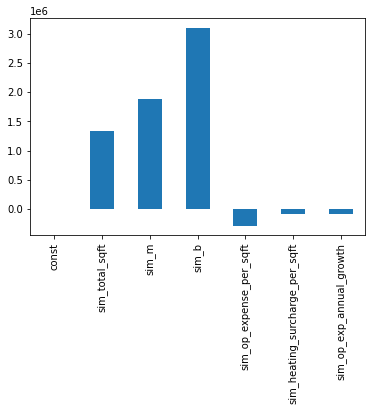

In [ ]:
norm_coefficients = result.params * X.std()
import matplotlib.pyplot as plt

norm_coefficients.plot.bar()